# Hyperthyroid Disorders Prediction

# Introducation:

             Hypothyroidism is a condition where the thyroid gland doesn't produce enough hormones, leading to symptoms like fatigue, weight gain, and depression.To improve diagnosis, this project develops a  machine learning model using patient data such as age, sex, medical history, and specific thyroid-related measurements like TSH and T3 levels. 
               By training and evaluating various models, we aim to predict hypothyroidism more accurately and efficiently, helping doctors provide better patient care.


# Description

                     In this notebook, we are going to predict diagnose thyroid disorders using patient data such as medical history, lab test results, and demographic information etc
                     The dataset we are going to use is the Thyroid disorder predication dataset from Kaggle which contains about 3772 rows × 30 columns features.
                     The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

# Motivation

                  Hypothyroidism can be hard to diagnose early because its symptoms are common in many other conditions. Traditional diagnosis methods are often slow and expensive. By using machine learning, we can quickly analyze patient data to predict hypothyroidism more accurately. 
                        This project aims to improve early detection and treatment, ultimately enhancing patient outcomes and making healthcare more efficient.


# Column Description

# Import Libraries

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df =pd.read_csv("hypothyroid.csv")
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,30,F,f,f,f,t,t,t,f,f,...,f,?,f,?,f,?,f,?,other,P
11312,68,F,f,f,f,t,f,t,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
11313,74,F,f,f,f,t,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
11314,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11316 entries, 0 to 11315
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        11316 non-null  int64 
 1   sex                        11316 non-null  object
 2   on thyroxine               11316 non-null  object
 3   query on thyroxine         11316 non-null  object
 4   on antithyroid medication  11316 non-null  object
 5   sick                       11316 non-null  object
 6   pregnant                   11316 non-null  object
 7   thyroid surgery            11316 non-null  object
 8   I131 treatment             11316 non-null  object
 9   query hypothyroid          11316 non-null  object
 10  query hyperthyroid         11316 non-null  object
 11  lithium                    11316 non-null  object
 12  goitre                     11316 non-null  object
 13  tumor                      11316 non-null  object
 14  hypopi

# Checking missing values

In [4]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [5]:
# Iterate over each column name
for column in df.columns:
    # Get the unique values in the column
    unique_values = df[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()  # Print an empty line for separation

Unique values in column 'age':
[ 41  23  46  70  18  59  80  66  68  84  67  71  28  65  42  63  51  81
  54  55  60  25  73  34  78  37  85  26  58  64  44  48  61  35  83  21
  87  53  77  27  69  74  38  76  45  36  22  43  72  82  31  39  49  62
  57   1  50  30  29  75  19   7  79  17  24  15  32  47  16  52  33  13
  10  89  56  20  90  40  88  14  86  94  12   4  11   8   5 455   2  91
   6  93  92   0]

Unique values in column 'sex':
['F' 'M' '?']

Unique values in column 'on thyroxine':
['f' 't']

Unique values in column 'query on thyroxine':
['f' 't']

Unique values in column 'on antithyroid medication':
['f' 't']

Unique values in column 'sick':
['f' 't']

Unique values in column 'pregnant':
['f' 't']

Unique values in column 'thyroid surgery':
['f' 't']

Unique values in column 'I131 treatment':
['f' 't']

Unique values in column 'query hypothyroid':
['f' 't']

Unique values in column 'query hyperthyroid':
['f' 't']

Unique values in column 'lithium':
['f' 't']

Unique valu

# Replace '?' with NaN

In [6]:

df['TSH'].replace('?', np.nan, inplace=True)
df['TT4'].replace('?', np.nan, inplace=True)
df['T3'].replace('?', np.nan, inplace=True)
df['T4U'].replace('?', np.nan, inplace=True)
df['FTI'].replace('?', np.nan, inplace=True)
df['sex'].replace('?', np.nan, inplace=True)
df['age'].replace('?', np.nan, inplace=True)

# Change Datatype

In [7]:
 
df['age']=df['age'].astype(float)
df['TSH']=df['TSH'].astype(float)
df['T3']=df['T3'].astype(float)
df['TT4']=df['TT4'].astype(float)
df['T4U']=df['T4U'].astype(float)
df['FTI']=df['FTI'].astype(float)

# Checking null values

In [8]:
df.isnull().sum()

age                             0
sex                           422
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                          1099
T3 measured                     1
T3                           2264
TT4 measured                    0
TT4                           684
T4U measured                    0
T4U                          1152
FTI measured                    0
FTI                          1146
TBG measured                    0
TBG                             0
referral source                 0
binaryClass   

# For replacing numerical columns

# Taking mean of the column which has null value and replace with mean

In [9]:
 
df_mean=df['age'].mean()
df['age']=df['age'].fillna(df_mean)

df_mean=df['TSH'].mean()
df['TSH']=df['TSH'].fillna(df_mean)

df_mean=df['T3'].mean()
df['T3']=df['T3'].fillna(df_mean)

df_mean=df['TT4'].mean()
df['TT4']=df['TT4'].fillna(df_mean)

df_mean=df['T4U'].mean()
df['T4U']=df['T4U'].fillna(df_mean)

df_mean=df['FTI'].mean()
df['FTI']=df['FTI'].fillna(df_mean)

# For replacing object columns

In [10]:
df.isnull().sum()

age                            0
sex                          422
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                            0
T3 measured                    1
T3                             0
TT4 measured                   0
TT4                            0
T4U measured                   0
T4U                            0
FTI measured                   0
FTI                            0
TBG measured                   0
TBG                            0
referral source                0
binaryClass                    0
dtype: int

# Taking mode of the column which has null value and replace with mode

In [11]:
mode_value= df["sex"].mode()[0]
df["sex"].fillna(mode_value,inplace= True)

mode_value= df["T3 measured"].mode()[0]
df["T3 measured"].fillna(mode_value,inplace= True)

In [12]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

# Drop unnecessary columns

In [13]:
df.drop(columns=["TSH measured","TT4 measured","T4U measured",
                 "FTI measured","TBG measured", "TBG","referral source"], inplace=True)

In [14]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3 measured,T3,TT4,T4U,FTI,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.300000,t,2.500000,125.00000,1.140000,109.000000,P
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,4.100000,t,2.000000,102.00000,0.995462,110.434169,P
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.980000,f,2.017192,109.00000,0.910000,120.000000,P
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.160000,t,1.900000,175.00000,0.995462,110.434169,P
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.720000,t,1.200000,61.00000,0.870000,70.000000,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,30.0,F,f,f,f,t,t,t,f,f,...,t,f,f,5.029973,f,2.017192,108.33718,0.995462,110.434169,P
11312,68.0,F,f,f,f,t,f,t,f,f,...,f,f,f,1.000000,t,2.100000,124.00000,1.080000,114.000000,P
11313,74.0,F,f,f,f,t,f,f,f,f,...,f,f,f,5.100000,t,1.800000,112.00000,1.070000,105.000000,P
11314,72.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.700000,t,2.000000,82.00000,0.940000,87.000000,P


# Checking size (columns,rows) of Dataset

In [15]:

print("Number of rows: " + str(df.shape[0]))
print("Number of Columns: " + str(df.shape[1]))

Number of rows: 11316
Number of Columns: 23


# Visualization

### Age Distrubution

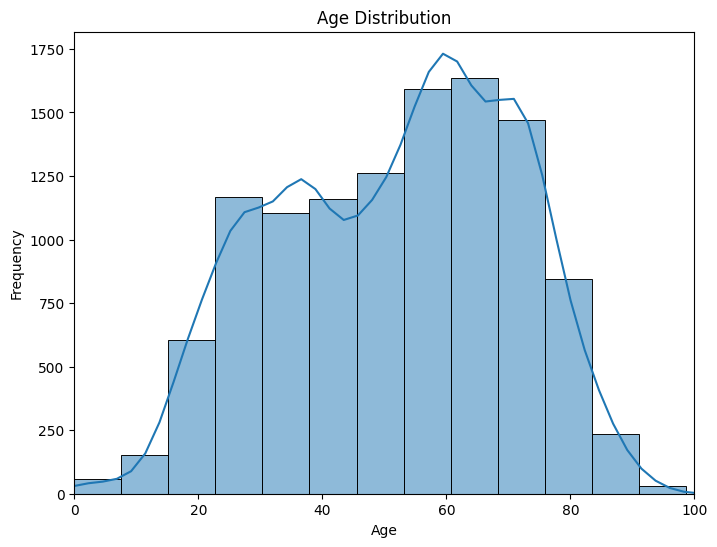

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=60, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Set the x-axis limits
plt.show()


### Distribution of Hypothyroidism Cases by Gender

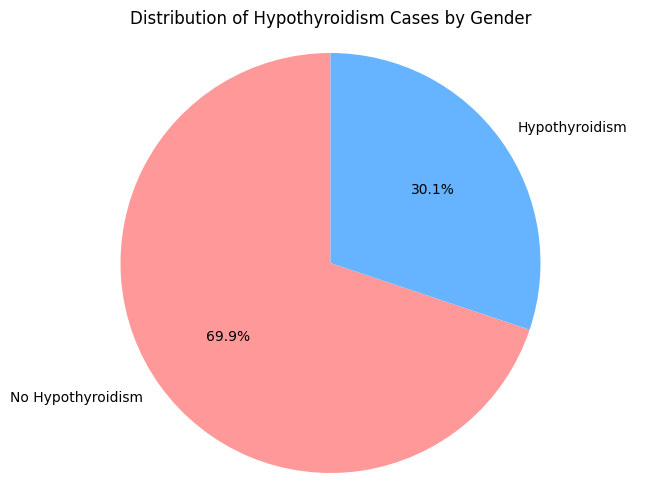

In [17]:
# Group the data by gender and hypothyroidism status
gender_hypothyroidism = df.groupby(['sex', 'binaryClass']).size().unstack()

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff']  # Color for 'no' and 'yes' hypothyroidism cases
labels = ['No Hypothyroidism', 'Hypothyroidism']
plt.pie(gender_hypothyroidism['P'], labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Hypothyroidism Cases by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


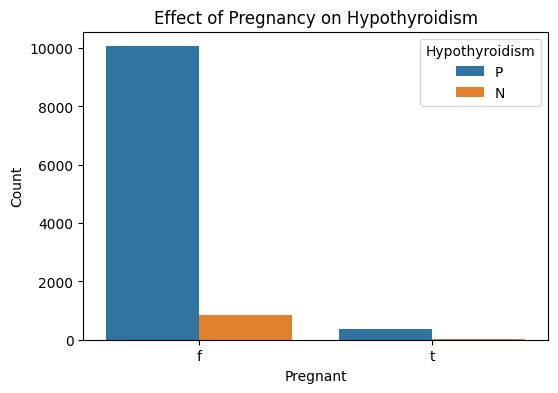

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='pregnant', hue='binaryClass', data=df)
plt.title('Effect of Pregnancy on Hypothyroidism')
plt.xlabel('Pregnant')
plt.ylabel('Count')
plt.legend(title='Hypothyroidism')
plt.show()



### Effect of Pregnancy on Hypothyroidism

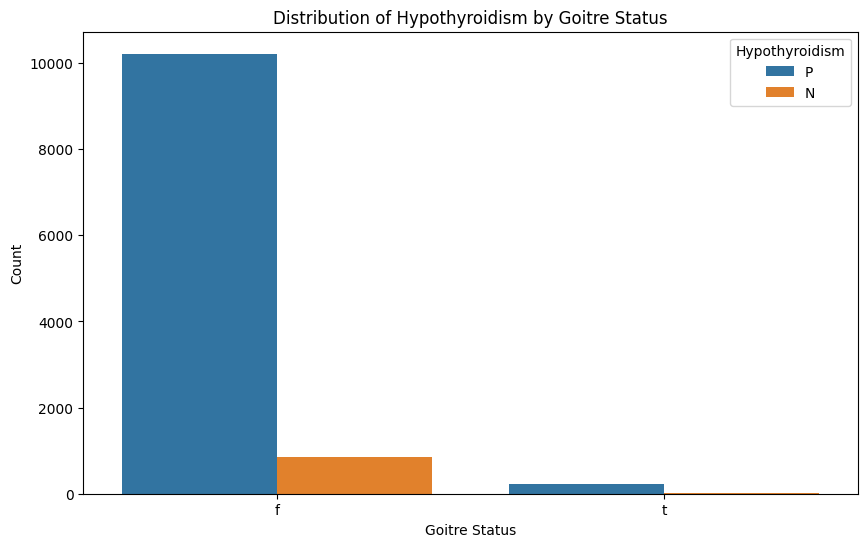

In [19]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='goitre', hue='binaryClass')
plt.title('Distribution of Hypothyroidism by Goitre Status')
plt.xlabel('Goitre Status')
plt.ylabel('Count')
plt.legend(title='Hypothyroidism')
plt.show()


### Relationship Between Age and TSH

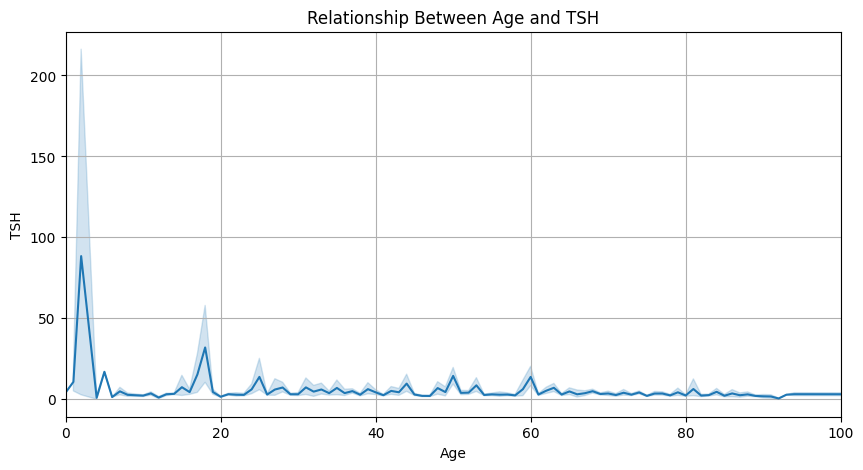

In [20]:
# Choose a hormone variable to analyze (e.g., TSH, T3, TT4)
hormone_variable = 'TSH'  # Replace 'TSH' with the hormone variable you want to analyze

# Plot a line plot showing the relationship between age and the chosen hormone level
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='age', y=hormone_variable)
plt.title('Relationship Between Age and {}'.format(hormone_variable))
plt.xlabel('Age')
plt.ylabel(hormone_variable)
plt.xlim(0, 100)  # Set the x-axis limits
plt.grid(True)  # Add gridlines for better readability
plt.show()

# Separting Numeric and category Data

# Numerical Data 

In [21]:
df_num=df.select_dtypes(['int','float'])
df_num

,age,TSH,T3,TT4,T4U,FTI
0,41.0,1.300000,2.500000,125.00000,1.140000,109.000000
1,23.0,4.100000,2.000000,102.00000,0.995462,110.434169
2,46.0,0.980000,2.017192,109.00000,0.910000,120.000000
3,70.0,0.160000,1.900000,175.00000,0.995462,110.434169
4,70.0,0.720000,1.200000,61.00000,0.870000,70.000000
...,...,...,...,...,...,...
11311,30.0,5.029973,2.017192,108.33718,0.995462,110.434169
11312,68.0,1.000000,2.100000,124.00000,1.080000,114.000000
11313,74.0,5.100000,1.800000,112.00000,1.070000,105.000000
11314,72.0,0.700000,2.000000,82.00000,0.940000,87.000000


# Object Data

In [22]:
df_object=df.select_dtypes(['object'])
df_object

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3 measured,binaryClass
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P
2,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,P
3,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,F,f,f,f,t,t,t,f,f,f,f,f,t,f,f,f,P
11312,F,f,f,f,t,f,t,f,f,f,f,f,f,f,f,t,P
11313,F,f,f,f,t,f,f,f,f,t,f,f,f,f,f,t,P
11314,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P


# Label Encoding 

# Using Label Encoder for converting category data into numeric

In [23]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
for i in df_object:
    df_object[i]=le.fit_transform(df_object[i]) 
#convert the cat to label encoder
df_object

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3 measured,binaryClass
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1
11312,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1
11313,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
11314,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


# Feacture scalling

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
x_scaled=sc.fit_transform(df_num)
x_scaled

array([[-5.37194899e-01, -1.68720954e-01,  6.33026248e-01,
         4.84319854e-01,  7.73523954e-01, -4.60335791e-02],
       [-1.43107008e+00, -4.20662242e-02, -2.25407275e-02,
        -1.84195846e-01,  0.00000000e+00,  4.56136234e-16],
       [-2.88896238e-01, -1.83195780e-01,  0.00000000e+00,
         1.92654537e-02, -4.57363792e-01,  3.07041495e-01],
       ...,
       [ 1.10157626e+00,  3.16760789e-03, -2.84767518e-01,
         1.06463154e-01,  3.98905944e-01, -1.74424515e-01],
       [ 1.00225680e+00, -1.95861253e-01, -2.25407275e-02,
        -7.65513846e-01, -2.96813217e-01, -7.52183727e-01],
       [ 6.04978942e-01, -1.82291104e-01,  2.39686063e-01,
        -2.71393546e-01,  3.98905944e-01, -5.91695057e-01]])

In [27]:
df_scaled = pd.DataFrame(data=x_scaled, columns=df_num.columns)
print(df_scaled)

            age           TSH        T3           TT4       T4U           FTI
0     -0.537195 -1.687210e-01  0.633026  4.843199e-01  0.773524 -4.603358e-02
1     -1.431070 -4.206622e-02 -0.022541 -1.841958e-01  0.000000  4.561362e-16
2     -0.288896 -1.831958e-01  0.000000  1.926545e-02 -0.457364  3.070415e-01
3      0.902937 -2.202875e-01 -0.153654  1.937615e+00  0.000000  4.561362e-16
4      0.902937 -1.949566e-01 -1.071448 -1.375898e+00 -0.671431 -1.297845e+00
...         ...           ...       ...           ...       ...           ...
11311 -1.083452 -4.017571e-17  0.000000  4.130513e-16  0.000000  4.561362e-16
11312  0.803618 -1.822911e-01  0.108573  4.552540e-01  0.452423  1.144551e-01
11313  1.101576  3.167608e-03 -0.284768  1.064632e-01  0.398906 -1.744245e-01
11314  1.002257 -1.958613e-01 -0.022541 -7.655138e-01 -0.296813 -7.521837e-01
11315  0.604979 -1.822911e-01  0.239686 -2.713935e-01  0.398906 -5.916951e-01

[11316 rows x 6 columns]


# Concatenate Numerical and Categorical Columns

In [28]:
df_new=pd.concat([df_scaled,df_object],axis=1)
df_new

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3 measured,binaryClass
0,-0.537195,-1.687210e-01,0.633026,4.843199e-01,0.773524,-4.603358e-02,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,-1.431070,-4.206622e-02,-0.022541,-1.841958e-01,0.000000,4.561362e-16,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,-0.288896,-1.831958e-01,0.000000,1.926545e-02,-0.457364,3.070415e-01,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.902937,-2.202875e-01,-0.153654,1.937615e+00,0.000000,4.561362e-16,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0.902937,-1.949566e-01,-1.071448,-1.375898e+00,-0.671431,-1.297845e+00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,-1.083452,-4.017571e-17,0.000000,4.130513e-16,0.000000,4.561362e-16,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11312,0.803618,-1.822911e-01,0.108573,4.552540e-01,0.452423,1.144551e-01,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
11313,1.101576,3.167608e-03,-0.284768,1.064632e-01,0.398906,-1.744245e-01,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
11314,1.002257,-1.958613e-01,-0.022541,-7.655138e-01,-0.296813,-7.521837e-01,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# split the data

In [29]:
y=df_new.iloc[:,-1:]
y

,binaryClass
0,1
1,1
2,1
3,1
4,1
...,...
11311,1
11312,1
11313,1
11314,1


In [30]:
x=df_new.drop('binaryClass',axis=1)
x

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3 measured
0,-0.537195,-1.687210e-01,0.633026,4.843199e-01,0.773524,-4.603358e-02,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.431070,-4.206622e-02,-0.022541,-1.841958e-01,0.000000,4.561362e-16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.288896,-1.831958e-01,0.000000,1.926545e-02,-0.457364,3.070415e-01,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.902937,-2.202875e-01,-0.153654,1.937615e+00,0.000000,4.561362e-16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.902937,-1.949566e-01,-1.071448,-1.375898e+00,-0.671431,-1.297845e+00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,-1.083452,-4.017571e-17,0.000000,4.130513e-16,0.000000,4.561362e-16,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
11312,0.803618,-1.822911e-01,0.108573,4.552540e-01,0.452423,1.144551e-01,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11313,1.101576,3.167608e-03,-0.284768,1.064632e-01,0.398906,-1.744245e-01,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
11314,1.002257,-1.958613e-01,-0.022541,-7.655138e-01,-0.296813,-7.521837e-01,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Distrubution of Target Column Values

In [31]:
y.value_counts()

binaryClass
1              10440
0                876
Name: count, dtype: int64

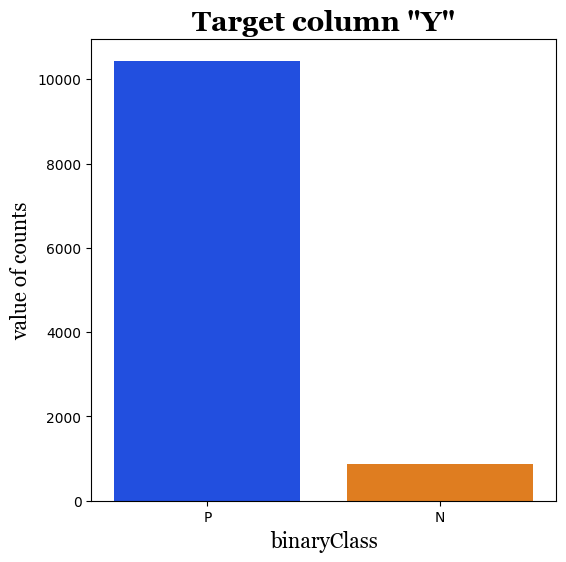

In [32]:
binaryClass = df['binaryClass'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=binaryClass.index, y=binaryClass.values, palette='bright')
plt.title('Target column "Y"', fontdict={
          'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('binaryClass', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('value of counts', fontdict={
           'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# Since the Data is imbalanced , need to do sampling (either Oversampling or Undersampling)

In [33]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

In [34]:
x=x_ros
y=y_ros

In [35]:
y.value_counts()     

binaryClass
0              10440
1              10440
Name: count, dtype: int64

# Importing the models and Train them

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Spliting training and testing Data

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [38]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier()

In [39]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

# Logistic Regression

In [40]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3106
           1       0.91      0.95      0.93      3158

    accuracy                           0.93      6264
   macro avg       0.93      0.93      0.93      6264
weighted avg       0.93      0.93      0.93      6264



LogisticRegression()

### Accuracy score on the train data

In [41]:
y_pred = logreg.predict(x_train)
Train_Accuracy_lr = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_lr*100,2),"%")

Accuracy score of the training data :  92.91 %


### Accuracy score on the test data

In [42]:
y_pred_on_test_data = logreg.predict(x_test)
Test_Accuracy_lr = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_lr*100,2),"%")

Accuracy score of the test data :  93.14 %


# KNN

In [43]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3106
           1       1.00      0.94      0.97      3158

    accuracy                           0.97      6264
   macro avg       0.97      0.97      0.97      6264
weighted avg       0.97      0.97      0.97      6264



KNeighborsClassifier()

### Accuracy score on the train data

In [44]:
y_pred = knn.predict(x_train)
Train_Accuracy_kn = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_kn*100,2),"%")

Accuracy score of the training data :  98.28 %


### Accuracy score on the test data

In [45]:
y_pred_on_test_data = knn.predict(x_test)
Test_Accuracy_kn = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_kn*100,2),"%")

Accuracy score of the test data :  97.13 %


# Decision Tree

In [46]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3106
           1       1.00      0.99      0.99      3158

    accuracy                           0.99      6264
   macro avg       0.99      0.99      0.99      6264
weighted avg       0.99      0.99      0.99      6264



DecisionTreeClassifier()

### Accuracy score on the train data

In [47]:
y_pred = dt.predict(x_train)
Train_Accuracy_dt = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_dt*100,2),"%")

Accuracy score of the training data :  100.0 %


### Accuracy score on the test data

In [48]:
y_pred_on_test_data = dt.predict(x_test)
Test_Accuracy_dt = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_dt*100,2),"%")

Accuracy score of the test data :  99.38 %


# Pruning techniques --> to solve the overfitting (hyper tunning)

## Max-Depth

In [49]:
for i in range(1, 30):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train, y_train)
    ypred=dt1.predict(x_test)

    ac=accuracy_score(y_test, ypred)
    print(f'{i} - {ac}')

1 - 0.9532247765006385
2 - 0.9605683269476373
3 - 0.9615261813537676
4 - 0.9655172413793104
5 - 0.9704661558109834
6 - 0.9733397190293742
7 - 0.9774904214559387
8 - 0.98227969348659
9 - 0.9872286079182631
10 - 0.9889846743295019
11 - 0.9907407407407407
12 - 0.992816091954023
13 - 0.992816091954023
14 - 0.992816091954023
15 - 0.9931353767560664
16 - 0.9934546615581098
17 - 0.9929757343550447
18 - 0.9931353767560664
19 - 0.9936143039591315
20 - 0.9934546615581098
21 - 0.9934546615581098
22 - 0.9932950191570882
23 - 0.9937739463601533
24 - 0.9937739463601533
25 - 0.9936143039591315
26 - 0.9936143039591315
27 - 0.9934546615581098
28 - 0.9937739463601533
29 - 0.9929757343550447


In [50]:
dt2=DecisionTreeClassifier(max_depth=2)
dt2.fit(x_train, y_train)
ypred=dt2.predict(x_test)

In [51]:
dt2.score(x_train, y_train)

0.9576491516146689

In [52]:
dt2.score(x_test, y_test)

0.9605683269476373

### Min_sample_split()

In [53]:
for i in range(31,50):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(x_train, y_train)
    ypred=dt3.predict(x_test)

    ac=accuracy_score(y_test, ypred)
    print(f'{i} - {ac}')
    

31 - 0.9840357598978289
32 - 0.9840357598978289
33 - 0.9840357598978289
34 - 0.9840357598978289
35 - 0.9840357598978289
36 - 0.9840357598978289
37 - 0.9840357598978289
38 - 0.9832375478927203
39 - 0.9832375478927203
40 - 0.9821200510855683
41 - 0.9816411238825032
42 - 0.9803639846743295
43 - 0.9803639846743295
44 - 0.9803639846743295
45 - 0.9794061302681992
46 - 0.979565772669221
47 - 0.979565772669221
48 - 0.979565772669221
49 - 0.9798850574712644


In [54]:
dt4=DecisionTreeClassifier(min_samples_split=154)
dt4.fit(x_train, y_train)
ypred=dt4.predict(x_test)

dt4.score(x_train, y_train)


0.9759168035030104

In [55]:
dt4.score(x_test, y_test)

0.9730204342273308

### Min_sample_leaf

In [56]:
for i in range(31,60):
    dt5=DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(x_train, y_train)
    ypred=dt5.predict(x_test)

    ac=accuracy_score(y_test, ypred)
    print(f'{i} - {ac}')

31 - 0.9736590038314177
32 - 0.9733397190293742
33 - 0.9733397190293742
34 - 0.9733397190293742
35 - 0.9712643678160919
36 - 0.9715836526181354
37 - 0.9695083014048531
38 - 0.9691890166028098
39 - 0.9695083014048531
40 - 0.9695083014048531
41 - 0.9715836526181354
42 - 0.9715836526181354
43 - 0.9712643678160919
44 - 0.9712643678160919
45 - 0.9722222222222222
46 - 0.9719029374201787
47 - 0.9722222222222222
48 - 0.9699872286079183
49 - 0.9696679438058748
50 - 0.9699872286079183
51 - 0.9699872286079183
52 - 0.9696679438058748
53 - 0.9699872286079183
54 - 0.9699872286079183
55 - 0.9699872286079183
56 - 0.9669540229885057
57 - 0.965676883780332
58 - 0.965676883780332
59 - 0.965676883780332


In [57]:
dt6=DecisionTreeClassifier(min_samples_leaf=59)
dt6.fit(x_train, y_train)
ypred=dt6.predict(x_test)



In [58]:
dt6.score(x_train, y_train)


0.9707170224411604

In [59]:
dt6.score(x_test, y_test)


0.965676883780332

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3106
           1       0.97      0.97      0.97      3158

    accuracy                           0.97      6264
   macro avg       0.97      0.97      0.97      6264
weighted avg       0.97      0.97      0.97      6264



In [61]:
y_pred = dt4.predict(x_train)
Train_Accuracy_dt4 = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_dt4*100,2),"%")

Accuracy score of the training data :  97.59 %


In [62]:
y_pred_on_test_data = dt4.predict(x_test)
Test_Accuracy_dt4 = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_dt4*100,2),"%")

Accuracy score of the test data :  97.3 %


# Random forest

In [63]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3106
           1       1.00      0.99      1.00      3158

    accuracy                           1.00      6264
   macro avg       1.00      1.00      1.00      6264
weighted avg       1.00      1.00      1.00      6264



RandomForestClassifier()

### Accuracy score on the train data

In [64]:
y_pred = rf.predict(x_train)
Train_Accuracy_rf = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_rf*100,2),"%")

Accuracy score of the training data :  100.0 %


### Accuracy score on the test data

In [65]:
y_pred_on_test_data = rf.predict(x_test)
Test_Accuracy_rf = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_rf*100,2),"%")

Accuracy score of the test data :  99.62 %


# SVM

In [66]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3106
           1       0.95      0.96      0.96      3158

    accuracy                           0.96      6264
   macro avg       0.96      0.96      0.96      6264
weighted avg       0.96      0.96      0.96      6264



SVC()

### Accuracy score on the train data

In [67]:

y_pred = svm.predict(x_train)
Train_Accuracy_svm = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_svm*100,2),"%")

Accuracy score of the training data :  95.61 %


### Accuracy score on the test data

In [68]:

y_pred_on_test_data = rf.predict(x_test)
Test_Accuracy_svm = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_svm*100,2),"%")

Accuracy score of the test data :  99.62 %


In [69]:
ML_Model=['Logistic Regression','k-Nearest Neighbors Regression','Decision Tree','Random Forest',' SVM']

Train_Accuracy=[Train_Accuracy_lr,Train_Accuracy_kn,Train_Accuracy_dt4,Train_Accuracy_rf,Train_Accuracy_svm]
Train_ACC = [(i,3) for i in Train_Accuracy]

Test_Accuracy=[Test_Accuracy_lr,Test_Accuracy_kn,Test_Accuracy_dt4,Test_Accuracy_rf,Test_Accuracy_svm]
Test_ACC = [(i,3) for i in Test_Accuracy]



In [70]:
#creating dataframe
results = pd.DataFrame({'ML Model': ML_Model,
                        'Train Accuracy':Train_Accuracy, 
                        'Test Accuracy': Test_Accuracy}, index=[1,2,3,4,5])

In [71]:
results

,ML Model,Train Accuracy,Test Accuracy
1,Logistic Regression,0.929050,0.931354
2,k-Nearest Neighbors Regression,0.982759,0.971264
3,Decision Tree,0.975917,0.973020
4,Random Forest,1.000000,0.996169
5,SVM,0.956076,0.996169


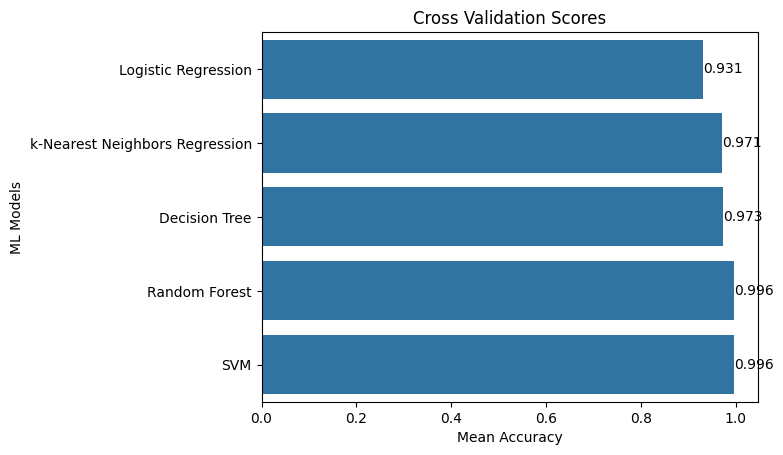

In [72]:
# Data
cv_results = pd.DataFrame({
    "Cross Validation Means": [Test_Accuracy_lr,Test_Accuracy_kn,Test_Accuracy_dt4,Test_Accuracy_rf,Test_Accuracy_svm],
    "ML Models": ['Logistic Regression', 'k-Nearest Neighbors Regression', 'Decision Tree', 'Random Forest', 'SVM']})

# Create bar plot

g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)

# Add labels to the bars
for index, value in enumerate(cv_results["Cross Validation Means"]):
    g.text(value, index, f'{value:.3f}', color='black', ha="left", va="center")

# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Show the plot
plt.show()

# Conclusion